## **Fashion MNIST Product Classification Project**

### **Introduction**
Imagine you are working as a Machine Learning Engineer at a popular fashion retail store, FashionHub. Your task is to analyze and classify products based on images to improve how the store manages its products.

### **Business Scenario and Problem**
The management team at FashionHub wants to make their product management more efficient. They have collected a large dataset of fashion items, but need a robust system to automatically categorize these products. They turn to you, the data analytics professional, to develop a machine learning model that can accurately classify these fashion items into predefined categories such as T-shirts, trousers, bags, and shoes.

#### **Goals**
Your goals in this project are to:

1. **Analyze the Fashion MNIST dataset** to understand its structure and content.
2. **Build a machine learning model** that can classify fashion items into categories.
3. **Evaluate the model's performance** and determine its accuracy.
4. **Provide insights** on how the model can be used to improve inventory management and customer satisfaction.

<img src='https://miro.medium.com/v2/resize:fit:1400/0*LRyHZb_JBpuuNVzd' width="350" align=left>

Using the PACE Strategy let's build a network. If we can accurately classify fashion items, it will streamline the product management process, reduce the workload of manual categorization, and help in organizing products more effectively. This can lead to improved efficiency and better service for customers at FashionHub.

## **PACE: Plan**

First, let's consider one of the most important questions that we should ask ourselves:
- **What am I being asked to do?**
> Recall that we are tasked to build a machine learning model that can accurately classify **images** of fashion items into predefined categories. The primary objective is to improve the efficiency of product management at FashionHub by automating the categorization process.

Asking this question is very essential in the first stage, since it determines the business need and can give us a better overview of the model we are going to build in the *Construct* phase. <br>

We are being asked to evaluate a model that can classify images; so the best choice is a neural network. Now that we have a clear perspective of the general business model, let's consider asking the following question:
- **Which type of neural network is suitable for this scenario?**
> For this image classification task, we are going to build a  `"Convolutional Neural Network"` and here’s why:<br>
> - **CNNs and Images:** CNNs work best with images, 2D inputs (images), or 3D inputs (videos). Their architecture is particularly well-suited for tasks involving spatial hierarchies in images.
> - **Feature Extraction:** CNNs use convolutional operations that help them to filter, detect, and extract the most important features from a range of pixels. So rather than hand-engineered code for selecting the features from an image, the network will automatically do it for us. This automatic feature selection reduces the need for manual feature engineering, which is often required in traditional machine learning methods.
> - **Pooling Layers:** CNNs use pooling layers to reduce the dimensionality of the data while retaining important features.

A Convolutional Neural Network would look like this:

<img src="https://editor.analyticsvidhya.com/uploads/29624cnn_banner.png" alt="CNN Diagram" width="650"/>

## **PACE: Analyze**

## Task 1. Imports and data loading
Let's start by importing packages needed to build machine learning model

In [1]:
# Import packages for data manipulation
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Import packages for loading the data
from tensorflow.keras.datasets import fashion_mnist

# Import tensorflow for building the model
import tensorflow as tf

Now load the data from TensorFlow built-in dataset. The dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 $\times$ 28 pixels), as shown here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite" width="600">
  </td></tr>
  <tr><td align="center">
  </td></tr>
</table>

In [2]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

The images are 28 $\times$ 28 arrays, with pixel values in the range `[0, 255]`. The *labels* are an array of integers, in the range `[0, 9]`. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [3]:
# Store the class names in a list
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Task 2. Exploratory Data Analysis

Let's explore the shape of the dataset:

In [4]:
# Get the shape of the data
print('------------------------------------------')
print(f'Shape of the training set: {train_images.shape}')
print('------------------------------------------')
print(f'Shape of the test set: {test_images.shape}')
print('------------------------------------------')

------------------------------------------
Shape of the training set: (60000, 28, 28)
------------------------------------------
Shape of the test set: (10000, 28, 28)
------------------------------------------


Now let's plot the distribution of the labels to check the class balance and gain a deeper understanding of the labels.

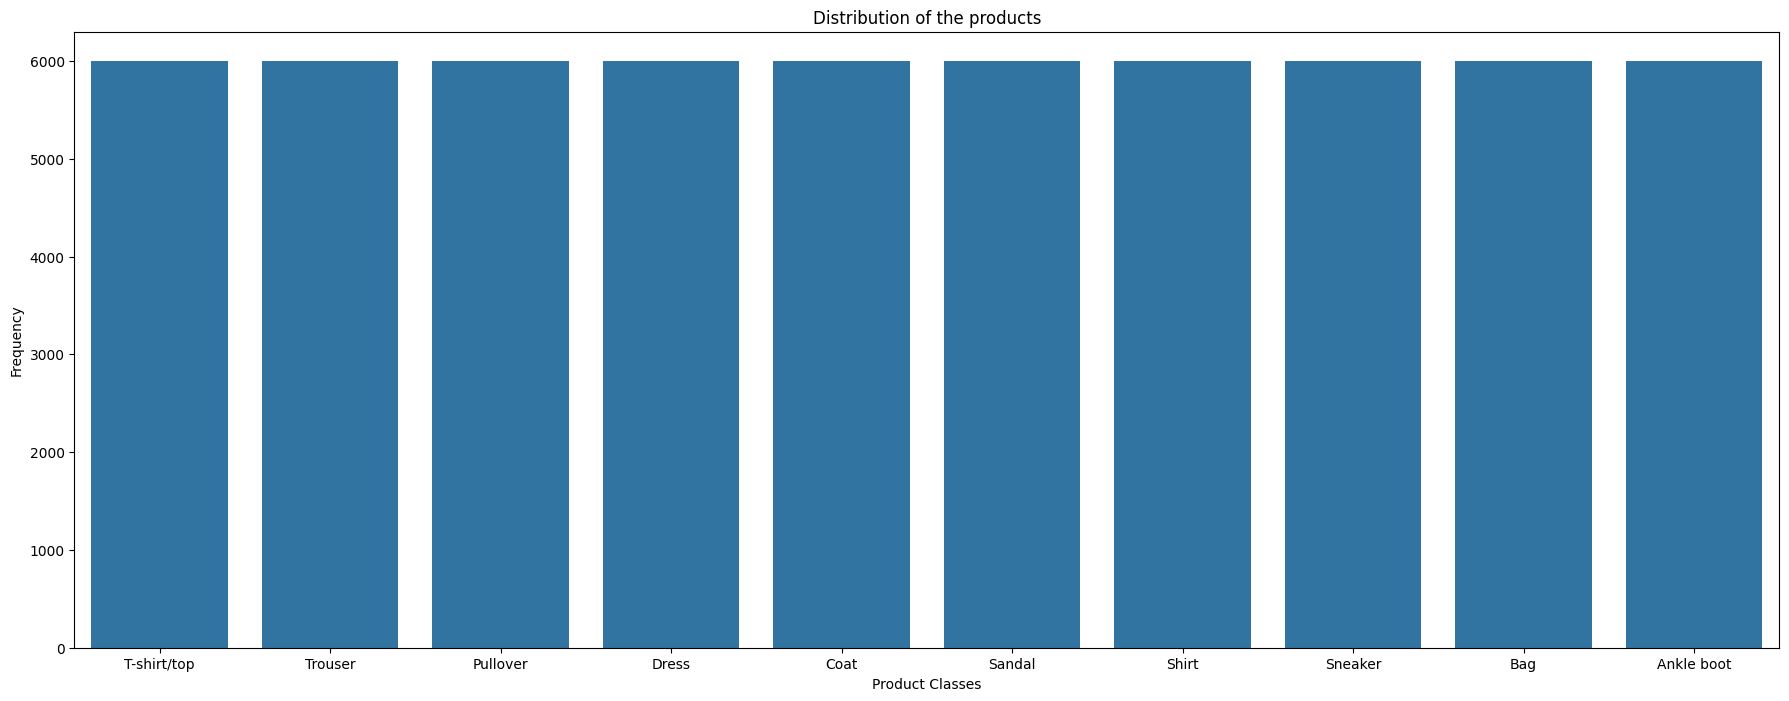

In [5]:
# Plot the distribution of the classes
plt.figure(figsize=(22, 8))

plt.title('Distribution of the products')
sns.countplot(x=train_labels)
plt.xlabel('Product Classes')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(class_names)), labels=class_names)

plt.show();

All of the classes have the same distribution. This is a **Uniform Distribution** (which describes the probability where every event has an equal chance of occurring), since we have 10 unique classes and each class has a frequency of 6000 (10 x 6000 = 60000). So there's no need to stratify the labels.

Finally, let's plot a set of images to see what they look like.

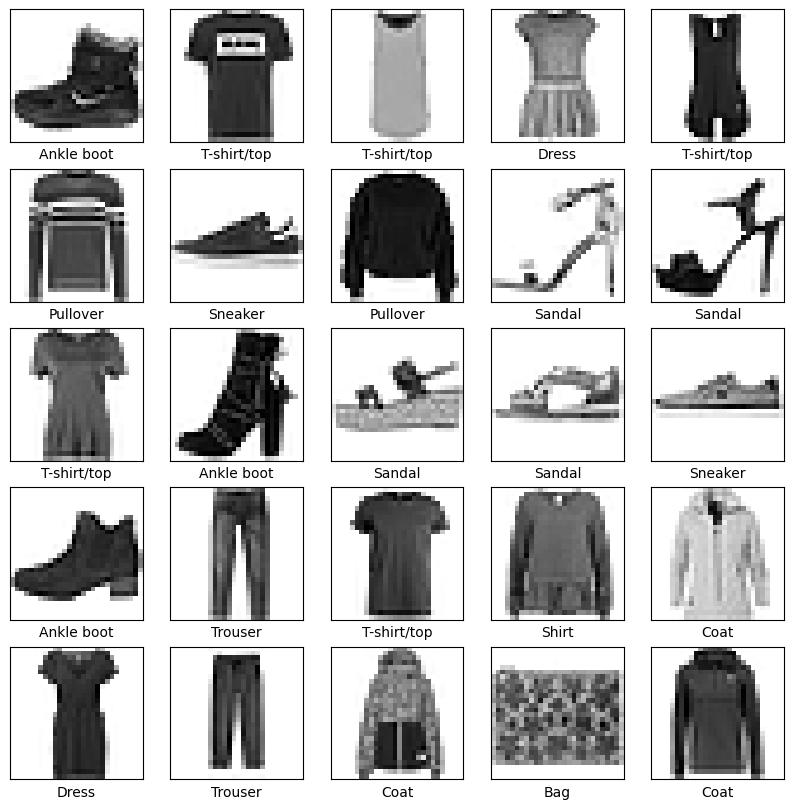

In [6]:
# Display the first 25 images from the training set and display the class name below each image
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show();

## Task 3. Preprocess the data

As we saw above, there are 60000 examples in the training set and 10000 in the test set. Each image has dimensions of (28, 28, 1) pixels since they are grayscale. We are going to use Image Augmentation to prevent overfitting, but it's important to note that the ImageDataGenerator expects a 4D array for images with the shape `(num_samples, height, width, channels)`. Both the train_images and test_images arrays should include a channel dimension, even if it's grayscale. Therefore, we need to reshape the data to ensure it has the appropriate format.

In [7]:
# Reshape train_images and test_images to include the channel dimension
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

print(f'Shape of the Training-set after reshaping: {train_images.shape}')
print(f'Shape of the Testing-set after reshaping: {test_images.shape}')

Shape of the Training-set after reshaping: (60000, 28, 28, 1)
Shape of the Testing-set after reshaping: (10000, 28, 28, 1)


We also need to convert the target variable into categorical variable.

In [8]:
# One-Hot Encode the target variable
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

Now let's write a function that normalizes the training and testing sets

In [9]:
# Normalize the Train-Test sets
def Normalize(X_train, X_test):
  X_train, X_test = X_train / 255.0, X_test / 255.0
  return X_train, X_test

In [10]:
# Apply the function to the Train-Test sets
train_images, test_images = Normalize(train_images, test_images)

Lastly, we need to split the training-set into two train-validation sets. Since we already have a separate test set, there's no need to split the data further.

In [11]:
# Split the data into two train-validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)

### **Data augmentation**
Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via several random transformations that yield believable-looking images. The goal is that at training time, the model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better. We will first create a data augmentation object and then apply it to the training set.

To start off, let's define a function that can display an image, so we can see the type of augmentation that has been performed. Then, we'll look at specific augmentations that we'll use during training.

In [12]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img, cmap=plt.cm.binary)
    plt.tight_layout()
    plt.show();

Now let's apply rescale, rotation of 10 degrees, width shift, height shift, horizontal flip, and zoom augmentation to our training images.

In [13]:
# Create a transformation object
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply the transformations to the training set
datagen.fit(X_train)

Let's visualize how a single image would look like 5 different times, when we pass these augmentations randomly to our dataset.

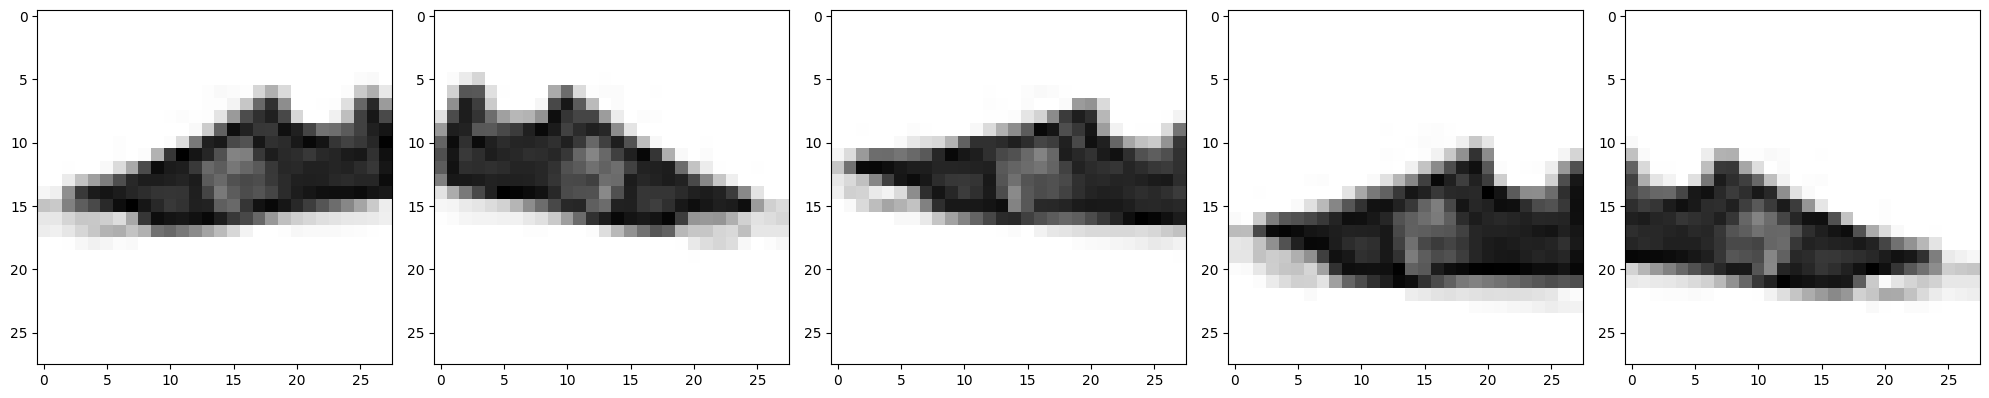

In [14]:
# Generate a batch of augmented images
augmented_images = [datagen.random_transform(X_train[0]) for i in range(5)]

# Plot the augmented images
plotImages(augmented_images)

Technically, we don't apply the transformations to the test-validation sets. We leave the test set untouched and apply the validation data just with the purpose of testing the performance of the model during the training process.

## **PACE: Construct**

## Task 4. Build the model

We start by building a neural network with 3 convolutional layers.

In [15]:
# Create a convolutional neural network
model = tf.keras.models.Sequential([

    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Task 5. Compile the model
Before the model is ready for training, it needs a few more settings. We would set the "Loss function" to be `Categorical Crossentropy`, the "Optimizer" to be `Adam`, and the "Metrics" to be `Accuracy`. Note that we use categorical crossentropy because we already converted the target variable into a categorical variable. Otherwise, we would use `Sparse Categorical Crossentropy`.

In [16]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the total #parameters in the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 9, 9, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 143,242 (559.54 KB)

 Trainable params: 143,242 (559.54 KB)

 Non-trainable params: 0 (0.00 B)

## Task 6. Train the model

We'll continue our process with training the model using the augmented train images. We also will utilize the normalized validation data to evaluate the model's performance during training.

In [17]:
# Train the model using the generator
epochs = 25
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    shuffle=True)

Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5372 - loss: 1.2436 - val_accuracy: 0.8021 - val_loss: 0.5099
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7880 - loss: 0.5729 - val_accuracy: 0.8593 - val_loss: 0.3978
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8333 - loss: 0.4639 - val_accuracy: 0.8670 - val_loss: 0.3701
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8536 - loss: 0.4049 - val_accuracy: 0.8770 - val_loss: 0.3359
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8606 - loss: 0.3833 - val_accuracy: 0.8864 - val_loss: 0.3165
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8712 - loss: 0.3604 - val_accuracy: 0.8952 - val_loss: 0.2912
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8796 - loss: 0.3328 - val_accuracy: 0.8948 - val_loss: 0.2909
Epoch 8/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8801 - loss: 0.3299 - val_accuracy: 0.

### **Results:**

**Training-set:** The model performs well on the training data, with a high accuracy and relatively low loss.

**Validation-set:** The validation accuracy and loss are very close to the training metrics (With a drasticly small difference of 0.0049), indicating that the model is not overfitting significantly. This suggests that the model is learning well from the training data and generalizing adequately to unseen data. It's safe to test the model on the test data.

## Task 7. Plot the Accuracies and Losses

Let's plot the loss and accuracy between the two train-validation sets and analyze them to gain a deeper understanding of whether they are overfitting or not. We should extract the two from the dictionary saved in the **history** variable.

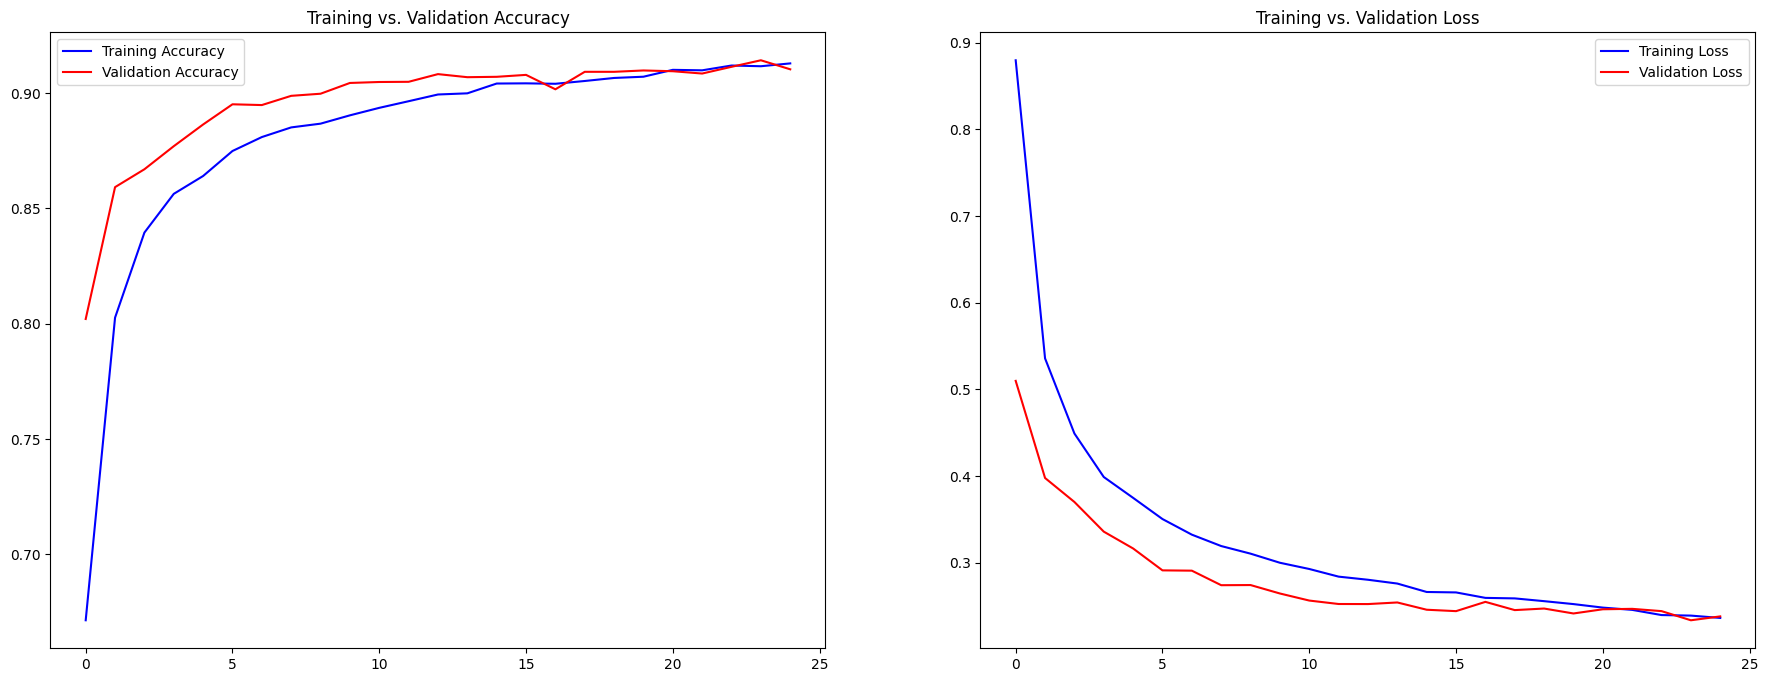

In [18]:
# Extract the loss and accuracy from the dictionary and plot them
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(22, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', color='blue')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='red')
plt.legend()
plt.title('Training vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color='blue')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='red')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show();

### **Interpretation of Graphs**

It is crucial to note that the number of batch sizes has a significant impact on reducing loss per epoch. These tiny zigzags are due to the fact that we're using Mini-Batch Gradient Descent. A lower batch size may result in more noise being detected by our model, which can hinder effective learning. On the other hand, a higher batch size can lead to faster convergence and reduced noise. In this particular model, a batch size of $128$ appears to be a reasonable choice as it not only accelerates convergence but also results in a smoother curve.

## **PACE: Execute**

## Task 8. Evaluate accuracy

Let's compare how the model performs on the test dataset. We use all examples we have in the test dataset to assess accuracy.

In [19]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Accuracy on test dataset: {accuracy:.4}')
print(f'Loss on test dataset: {loss:.4}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9067 - loss: 0.2633
Accuracy on test dataset: 0.9066
Loss on test dataset: 0.2534


The test accuracy and loss are slightly lower than the training and validation metrics, but the drop is not substantial. This indicates that the model is performing well on completely unseen data, though there might be a slight overfitting or just natural variation between the datasets.


### **Overall Interpretation:**

**Good Generalization:** The model generalizes well, as evidenced by the close alignment between the training, validation, and test accuracies, even though with a drastically small drop.

**Slight Overfitting or Natural Variability:** The slightly higher test loss and marginally lower test accuracy compared to training/validation metrics could be due to mild overfitting or natural variability between the datasets.

## Task 9. Making & Visualizing Predictions

Since the model performed well on the test set, we will now proceed to make predictions and visualize them. This will provide us with a clearer overview of the model's confidence in each prediction.

In [20]:
# Make predictions on the test set
predictions = model.predict(test_images)

n = 10
for i in range(n):
  y_pred, y_true = np.argmax(predictions[i]), np.argmax(test_labels[i])
  print(f'Predicted by model {class_names[y_pred]}, The Actual is {class_names[y_true]}')
print('--------------------------------------------------------')
print(f'The Accuracy on the first {n} images: {np.mean(y_pred == y_true)*100}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted by model Ankle boot, The Actual is Ankle boot
Predicted by model Pullover, The Actual is Pullover
Predicted by model Trouser, The Actual is Trouser
Predicted by model Trouser, The Actual is Trouser
Predicted by model Shirt, The Actual is Shirt
Predicted by model Trouser, The Actual is Trouser
Predicted by model Coat, The Actual is Coat
Predicted by model Shirt, The Actual is Shirt
Predicted by model Sandal, The Actual is Sandal
Predicted by model Sneaker, The Actual is Sneaker
--------------------------------------------------------
The Accuracy on the first 10 images: 100.0%


In [21]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[..., 0], cmap=plt.cm.binary)

    # Convert true_label from one-hot encoding to an integer
    true_label = np.argmax(true_label)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_labels):
    predictions_array, true_label = predictions_array[i], true_labels[i]
    plt.grid(False)

    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])

    # Convert true_label from one-hot encoding to an integer
    true_label = np.argmax(true_label)

    predicted_label = np.argmax(predictions_array)

    # Color the predicted label red
    thisplot[predicted_label].set_color('red')
    # Color the true label blue
    thisplot[true_label].set_color('blue')

    # Display only the predicted class label under the corresponding bar
    plt.xticks([predicted_label], [class_names[predicted_label]], fontsize=10)
    plt.tight_layout()

Let's display multiple images along with their predictions. The correct prediction labels will be shown in blue, while incorrect labels will be displayed in red. Any other uncertainty will be shown in gray. The percentage shown indicates the confidence level for the predicted label, ranging from 0 to 100. It's important to note that a prediction can still be wrong even when the confidence level is very high.

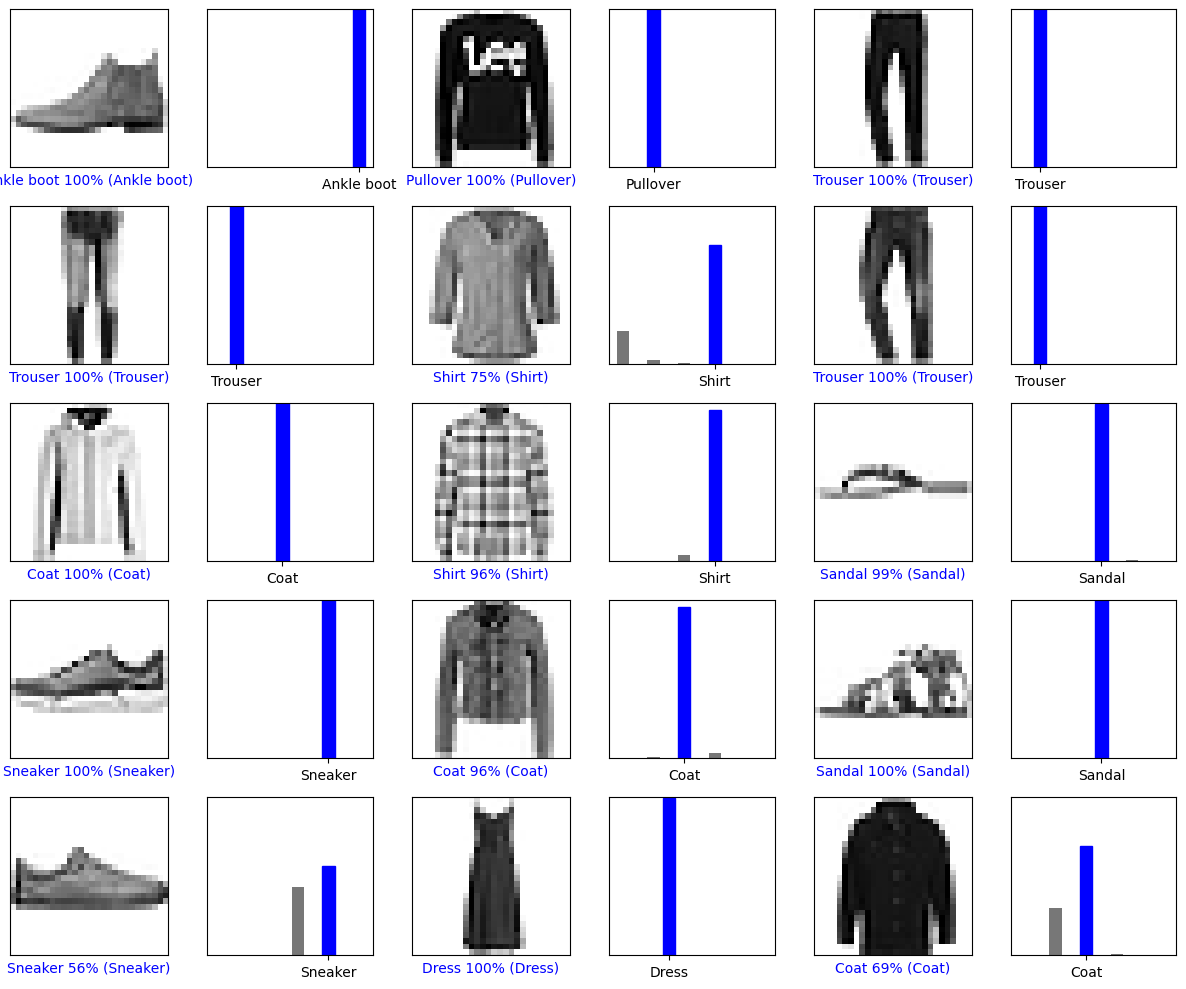

In [22]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

Except for the first and third images in the last row, which only achieved confidence scores of 56% and 69% respectively, the overall performance is positive and favorable. Let's save the model so we can use it later without needing to re-train it.

In [ ]:
# Save the model
image_recognizer = model.save('mnist.h5')

# **Conclusion**

In summary, the model trained on the Fashion MNIST dataset demonstrates satisfactory performance in classifying different types of clothing and accessories. The visualizations indicate that the model correctly identifies most items with high confidence. However, certain items, like the sneaker in the last row of the test images, show lower confidence levels, suggesting areas for further refinement. Overall, the results are positive, indicating the model's effectiveness in handling the Fashion MNIST dataset. Future improvements could involve fine-tuning the model's architecture or using more advanced techniques to enhance its accuracy and robustness.